# Import 

In [72]:
from keras.layers import Input, Dense,Flatten, LeakyReLU as LR,Dropout,Activation,Reshape,Conv2D,UpSampling2D,MaxPooling2D
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras.models import Sequential
import itertools

In [73]:
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [74]:
# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))


In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


# Train

In [6]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 10ms/step - loss: 0.2757 - val_loss: 0.1904
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1700 - val_loss: 0.1517
Epoch 3/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1428 - val_loss: 0.1328
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1278 - val_loss: 0.1207
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1177 - val_loss: 0.1123
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1107 - val_loss: 0.1065
Epoch 7/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1056 - val_loss: 0.1022
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1019 - val_loss: 0.0991
Epoch 9/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0992 - val_loss: 0.0969
Epoch 10/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0974 - val_loss: 0.095

In [7]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

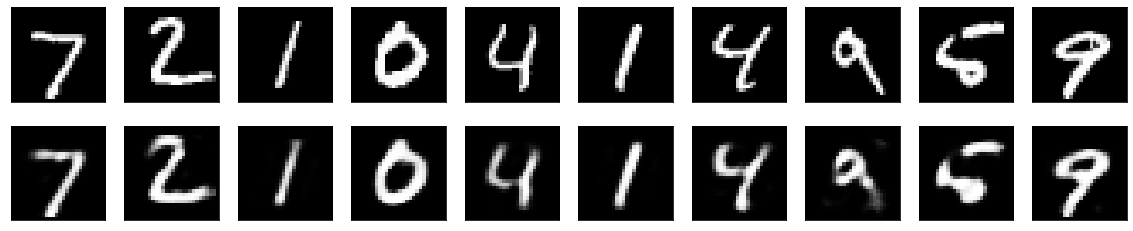

In [8]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Part I 

In [73]:
n = len(encoded_imgs)
sumOfTest = []
sumOfDecoded = []

#for each image (encoded and decoded) find the sum of all of the pixels 
#10000 images 
for i in range(n):
    summedTest = sum(x_test[i])
    summedDecoded = sum(decoded_imgs[i])
    
    #add the summed pixels (integer) to array (10000x1)
    sumOfTest.append(summedTest)
    sumOfDecoded.append(summedDecoded)
    

sumOfTest = np.array(sumOfTest)
sumOfDecoded = np.array(sumOfDecoded)

#difference between test(encoded images) and decoded images 
difference = sumOfTest - sumOfDecoded
print('diff',difference)

In [72]:
#create dictionary to map each index to its error value 
Dict = {}

for i in range(len(difference)): 
    #contains 10,000 indices with respective errors 
    Dict[i] = difference[i]
    
#sort the dictionary from smallest # (highest error) to lowest error 
sorting = dict(sorted(Dict.items(), key=lambda item: item[1]))

#choose the top ten highest errors from Dictionary 
x = dict(itertools.islice(sorting.items(), 10))
print('Highest Error Images:',x)

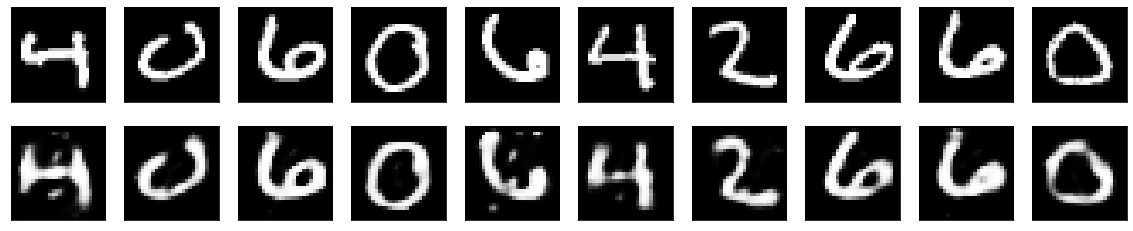

we can see some of the reconstructed images are very low quality in comparison to the original images.
For example images 1 and 5 (numbers 4 and 6 respectively) share the general shape with the original images but have a lot of noise


In [71]:
#turn dictionary into list of indices that contain highest error images 
indices = list(x)
#images displayed
n = len(indices)  

plt.figure(figsize=(20, 4))
for i in range(len(indices)):
    #display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[indices[i]].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[indices[i]].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()    

print('we can see some of the reconstructed images are very low quality in comparison to the original images.')
print('For example images 1 and 5 (numbers 4 and 6 respectively) share the general shape with the original images but have a lot of noise')

# Part II 

In [107]:
import tensorflow._api.v2.compat.v1 as tf 
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [488]:
#read in data 
test = pd.read_csv('data1.csv')
#clean data
test = np.array(test.iloc[:,0:29].dropna())
test[:,0:28] /= np.max(test)

In [489]:
print(len(test[test[:,-1]==1]))

492


# Part 2.1 Vanilla Autoencoder
## Number of hidden layers nodes = 2
## 1 Layer 

In [445]:
# number of hidden layers 
encoding_dim = 2

# input dimensions 
input_img = Input(shape=(28,))

# encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# lossy reconstruction of the input
# tanh produces better results than sigmoid 
decoded = Dense(28, activation='tanh')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))


In [446]:
autoencoder.compile(optimizer='adam', loss = 'binary_crossentropy')

In [458]:
#split training and testing data 
x_train, x_test, = train_test_split(test, test_size=0.1, random_state=42)
#get classes for training and testing 
colors_train, colors_test = x_train[:,-1], x_test[:,-1]
x_train, x_test = x_train[:,:28], x_test[:,:28]


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')



In [459]:
# train the model
autoencoder.fit(x_train,
                x_train,
                epochs=10,
                batch_size=100,
                shuffle=True)

autoencoder.summary()

Train on 256326 samples
Epoch 1/10
256326/256326 [==============================] - 4s 17us/sample - loss: -0.0027
Epoch 2/10
256326/256326 [==============================] - 4s 17us/sample - loss: -0.0026
Epoch 3/10
256326/256326 [==============================] - 4s 15us/sample - loss: -0.0033
Epoch 4/10
256326/256326 [==============================] - 4s 15us/sample - loss: -0.0033
Epoch 5/10
256326/256326 [==============================] - 5s 18us/sample - loss: -0.0031
Epoch 6/10
256326/256326 [==============================] - 4s 16us/sample - loss: -0.0033
Epoch 7/10
256326/256326 [==============================] - 4s 15us/sample - loss: -0.0027
Epoch 8/10
256326/256326 [==============================] - 4s 16us/sample - loss: -0.0025
Epoch 9/10
256326/256326 [==============================] - 4s 17us/sample - loss: -0.0028
Epoch 10/10
256326/256326 [==============================] - 4s 16us/sample - loss: -0.0028
Model: "model_109"
______________________________________________

# Part 2.3/ 2.4
### Histogram for Vanilla Autoencoder 

In [469]:
zeros = x_test[np.where(colors_test == 0)]
ones = x_test[np.where(colors_test == 1)]

#encode and reconstruct data for class = 0 and class = 1 
encoded_final_zeros = encoder.predict(zeros)
decoded_final_zeros = decoder.predict(encoded_final_zeros)

encoded_final_ones = encoder.predict(ones)
decoded_final_ones = decoder.predict(encoded_final_ones)

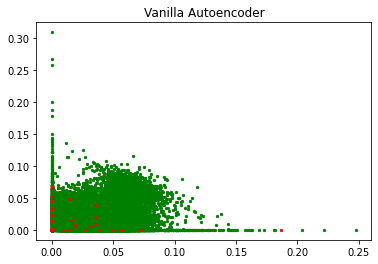

In [479]:
#plot 
x_plot_zeros, y_plot_zeros = encoded_final_zeros[:,0], encoded_final_zeros[:,1]
x_plot_ones, y_plot_ones = encoded_final_ones[:,0], encoded_final_ones[:,1]


plt.scatter(x_plot_zeros, y_plot_zeros, s = 5, color = 'green')
plt.scatter(x_plot_ones, y_plot_ones, s = 5, color = 'red')
plt.title('Vanilla Autoencoder')
plt.show()

In [333]:
#error values for autoencoder w/ 1 layer 
error1 = np.sum(x_test - decoded_final, axis = 1)

# Part 2.2 Deep Autoencoder
## Number of hidden layer nodes = 2 
## 2 Layers 

In [542]:
# number of hidden layers 
encoding_dim_1 = 2
encoding_dim_2 = 2


# input dimensions 
input_img = Input(shape=(28,))

# encoded representation of the input
encoded_1 = Dense(encoding_dim_1, activation='relu')(input_img)
encoded_2 = Dense(encoding_dim_2, activation='relu')(encoded_1)


# lossy reconstruction of the input
# sigmoid activation function produces bad results, tanh is better 
decoded_1 = Dense(encoding_dim_1, activation='tanh')(encoded_2)
decoded_2 = Dense(28, activation='tanh')(decoded_1)


autoencoder = Model(input_img, decoded_2)


encoder2 = Model(input_img, encoded_2)
# encoded input into the decoder
encoded_input = Input(shape=(encoding_dim_2,)) 



decoder_layer_1 = autoencoder.layers[-2]
decoder_layer_2 = autoencoder.layers[-1]

decoder2 = Model(encoded_input, decoder_layer_2(decoder_layer_1(encoded_input)))


In [543]:
autoencoder.compile(optimizer='adam', loss = 'binary_crossentropy')

In [544]:
#split training and testing data 
x_train, x_test, = train_test_split(test, test_size=0.1, random_state=42)
#get classes for training and testing 
colors_train, colors_test = x_train[:,-1], x_test[:,-1]
x_train, x_test = x_train[:,:28], x_test[:,:28]


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


In [545]:
# train the model
autoencoder.fit(x_train,
                x_train,
                epochs=10,
                batch_size=100,
                shuffle=True)

autoencoder.summary()

Train on 256326 samples
Epoch 1/10
256326/256326 [==============================] - 5s 20us/sample - loss: 7.7134e-05
Epoch 2/10
256326/256326 [==============================] - 4s 17us/sample - loss: 4.1819e-06
Epoch 3/10
256326/256326 [==============================] - 4s 17us/sample - loss: -2.3596e-05
Epoch 4/10
256326/256326 [==============================] - 4s 17us/sample - loss: -1.4784e-04
Epoch 5/10
256326/256326 [==============================] - 4s 17us/sample - loss: -2.4552e-04
Epoch 6/10
256326/256326 [==============================] - 4s 17us/sample - loss: -6.0113e-04
Epoch 7/10
256326/256326 [==============================] - 4s 17us/sample - loss: -0.0014
Epoch 8/10
256326/256326 [==============================] - 4s 17us/sample - loss: -0.0016
Epoch 9/10
256326/256326 [==============================] - 4s 17us/sample - loss: -0.0013
Epoch 10/10
256326/256326 [==============================] - 4s 17us/sample - loss: -0.0015
Model: "model_142"
________________________

In [546]:
zeros = x_test[np.where(colors_test == 0)]
ones = x_test[np.where(colors_test == 1)]

#encode and reconstruct data for class = 0 and class = 1 
encoded_final_zeros = encoder2.predict(zeros)
decoded_final_zeros = decoder2.predict(encoded_final_zeros)

encoded_final_ones = encoder2.predict(ones)
decoded_final_ones = decoder2.predict(encoded_final_ones)

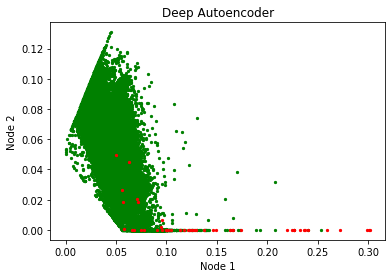

In [548]:
#plot 
x_plot_zeros, y_plot_zeros = encoded_final_zeros[:,0], encoded_final_zeros[:,1]
x_plot_ones, y_plot_ones = encoded_final_ones[:,0], encoded_final_ones[:,1]


plt.scatter(x_plot_zeros, y_plot_zeros, s = 5, color = 'green')
plt.scatter(x_plot_ones, y_plot_ones, s = 5, color = 'red')
plt.xlabel('Node 1')
plt.ylabel('Node 2')

plt.title('Deep Autoencoder')
plt.show()

In [554]:
# error values for 2 hidden layer network 
error2 = np.sum(x_test - decoded_final, axis = 1)
print(max(error2))

0.15722202


# Histogram of Reconstruction Errors for Layer =1 and Layer = 2 

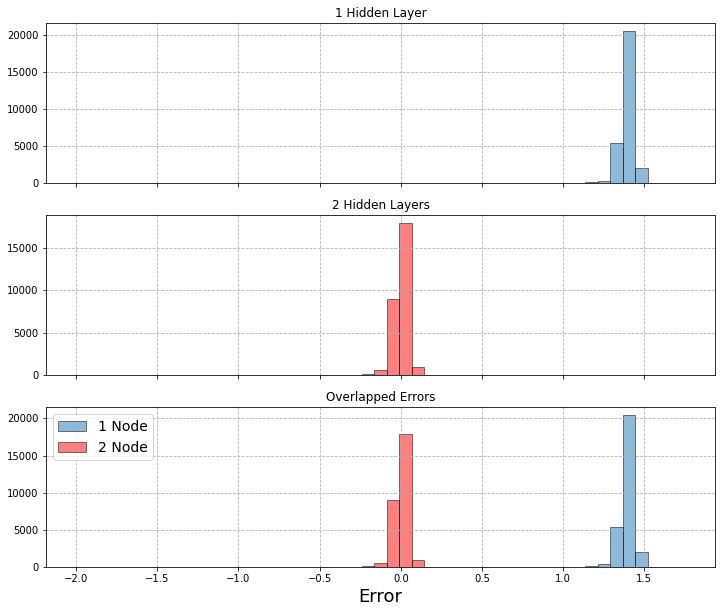

In [555]:

bins = np.linspace(-2, 1.75, 50)


fig, ax = plt.subplots(3, figsize = (12, 10), sharex = True)
ax[0].hist(error1, bins = bins, edgecolor = 'black', alpha = 0.5, label = '1 Node')
ax[0].grid(linestyle = '--')
ax[0].set_title('1 Hidden Layer')

ax[1].hist(error2, bins = bins, color = 'red', edgecolor = 'black', alpha = 0.5, label = '2 Node')
ax[1].grid(linestyle = '--')
ax[1].set_title('2 Hidden Layers')

ax[2].hist(error1, bins = bins, edgecolor = 'black', alpha = 0.5, label = '1 Node')
ax[2].hist(error2, bins = bins, color = 'red', edgecolor = 'black', alpha = 0.5, label = '2 Node')
ax[2].legend(fontsize = 14)
ax[2].set_xlabel('Error', fontsize = 18)
ax[2].grid(linestyle = '--')
ax[2].set_title('Overlapped Errors')


plt.show()

In [556]:
print(np.average(error1), np.std(error1))
print(np.average(error2), np.std(error2))

1.3908905 0.05000235
-3.8962757e-05 0.04708063


we can see from the histogram that the autoencoder with one hidden layer has a higher loss than the autoencoder with two hidden layers